# Preãmbulo


In [1]:
# Importando as bibliotecas básicas
import pandas as pd
import numpy as np

#Bibliotecas mais usadas para realizar calculos

In [2]:
# Geração de gráficos
import matplotlib.pyplot as plt

#cria gráfico de vários tipos sobre várias estatisticas

In [3]:
# Bibliotecas específicas para aprendizado de máquina
from sklearn.preprocessing import StandardScaler # Noramliza os dados
from sklearn.model_selection import train_test_split # Permite dividir o conjunto de dados
from sklearn.metrics import r2_score # Mede a eficiencia do modelo treinado
from sklearn.linear_model import SGDRegressor # Algoritmo de regressao linear
from sklearn.neural_network import MLPRegressor # Rede neural para regressao


## Carregamento do Data Set

# Nova seção

In [5]:
dataset = pd.read_csv("../home/auto-mpg.csv")
# carregando o data set para utilizar no código

FileNotFoundError: ignored

In [6]:
dataset.head()
# Comprovando que o data set foi carregado

NameError: ignored

Text(0.5, 1.0, 'Relação entre peso e autonomia dos veículos')

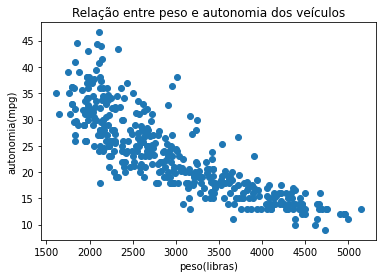

In [ ]:
plt.scatter(dataset[["weight"]], dataset[["mpg"]])
plt.xlabel("peso(libras)")
plt.ylabel("autonomia(mpg)")
plt.title("Relação entre peso e autonomia dos veículos")

# Utilizando o matplotlib para gerar um gráfico demosntrativo
# No gráfico demonstra que quanto mais pesado o vaículo for menos autonomia de 
# combustível vai ter.

### Pré-processamento

In [ ]:
X = dataset[["weight"]]
Y = dataset[["mpg"]]
# criando as primeiras variaveis

In [ ]:
X["weight"] = X["weight"] * 0.453592 # Convertendo libras em kilos
Y["mpg"] = Y["mpg"] * 0.425144 # Convertendo milhas por galão em kilometros por litro

In [ ]:
X
# demonstrando peso já convertido

,weight
0,1589.386368
1,1675.115256
2,1558.542112
3,1557.181336
4,1564.438808
...,...
393,1265.521680
394,966.150960
395,1040.993640
396,1190.679000


In [ ]:
Y
# demonstrando que milhas por galão foi convertido

,mpg
0,7.652592
1,6.377160
2,7.652592
3,6.802304
4,7.227448
...,...
393,11.478888
394,18.706336
395,13.604608
396,11.904032


In [ ]:
X.describe()
# Todos atributos Contundentes relativos ao peso

,weight
count,398.000000
mean,1347.360846
std,384.120654
min,731.643896
25%,1008.675210
50%,1271.645172
75%,1636.559936
max,2331.462880


In [ ]:
Y.describe()
# Todos atributos Contundentes relativos ao combustivel

,mpg
count,398.000000
mean,9.997080
std,3.322919
min,3.826296
25%,7.440020
50%,9.778312
75%,12.329176
max,19.811710


In [ ]:
# Normalização
escala = StandardScaler()
escala.fit(X)

X_norm = escala.transform(X)
# Criando uma escala para normalizar os atributos de X

In [ ]:
# Dividir em conjunto de treinamento e teste
X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.3)
# Criando atributo de treinameno e de testes para serem usados com a IA

### Processamento

In [ ]:
rna = MLPRegressor(hidden_layer_sizes=(10, 5), # Numeros de camadas ocultas
                   max_iter=2000, # numero máximo de epocas
                   tol=0.0000001, # quantidade de tolerancia
                   learning_rate_init=0.1, # taxa de aprendizado
                   solver="sgd", # método utilizado
                   activation="logistic", # Função de ativação
                   learning_rate="constant", # taxa de aprendisado
                   verbose=2, # Mostrar o que está aontecendo em cada época
                   )
# rna = rede neural articial, aqui se encontra todos os seu atributos

In [ ]:
rna.fit(X_norm_train, Y_train)
# Iniciando treinamento da rede neural

Iteration 1, loss = 42.22809682
Iteration 2, loss = 7.16643826
Iteration 3, loss = 6.87458689
Iteration 4, loss = 4.84388411
Iteration 5, loss = 4.85986429
Iteration 6, loss = 4.82899656
Iteration 7, loss = 4.80877829
Iteration 8, loss = 4.71855317
Iteration 9, loss = 4.50896288
Iteration 10, loss = 3.97623920
Iteration 11, loss = 2.94317633
Iteration 12, loss = 2.10359048
Iteration 13, loss = 1.62380084
Iteration 14, loss = 1.61170887
Iteration 15, loss = 1.72248042
Iteration 16, loss = 1.82333159
Iteration 17, loss = 1.83280403
Iteration 18, loss = 1.78416111
Iteration 19, loss = 1.71072482
Iteration 20, loss = 1.62128493
Iteration 21, loss = 1.58193446
Iteration 22, loss = 1.57710971
Iteration 23, loss = 1.58393953
Iteration 24, loss = 1.55662642
Iteration 25, loss = 1.53494036
Iteration 26, loss = 1.53966114
Iteration 27, loss = 1.49515919
Iteration 28, loss = 1.49160819
Iteration 29, loss = 1.49085414
Iteration 30, loss = 1.48829956
Iteration 31, loss = 1.48932878
Iteration 32, lo

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 5), learning_rate='constant',
             learning_rate_init=0.1, max_fun=15000, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='sgd', tol=1e-07,
             validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
reglinear = SGDRegressor(max_iter=2000,
                         tol=0.0000001,
                         eta0=0.1,
                         learning_rate="constant",
                         verbose=2
                        )
# Criando uma regreção linear para comparação

In [ ]:
reglinear.fit(X_norm_train, Y_train)
# iniciando o treinamento

-- Epoch 1
Norm: 3.46, NNZs: 1, Bias: 11.236442, T: 278, Avg. loss: 2.579096
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.64, NNZs: 1, Bias: 10.633046, T: 556, Avg. loss: 1.621459
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.98, NNZs: 1, Bias: 10.151670, T: 834, Avg. loss: 1.754659
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.54, NNZs: 1, Bias: 10.911509, T: 1112, Avg. loss: 1.672094
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.42, NNZs: 1, Bias: 9.748772, T: 1390, Avg. loss: 1.666970
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.13, NNZs: 1, Bias: 9.759012, T: 1668, Avg. loss: 1.743645
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3.25, NNZs: 1, Bias: 10.390631, T: 1946, Avg. loss: 1.699859
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=2000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=1e-07, validation_fraction=0.1, verbose=2,
             warm_start=False)

# Pós-Processamento

In [ ]:
#previsão no conjunto de teste
Y_rna_previsao = rna.predict(X_norm_test)
Y_rl_previsao = reglinear.predict(X_norm_test)
# comparando os testes da rna com reglinear para poder criar uma previsao

In [ ]:
#Calcular o R^2
r2_rna = r2_score(Y_test, Y_rna_previsao)
r2_rl = r2_score(Y_test, Y_rl_previsao)

print("R2 RNA:", r2_rna)
print("R2 RL:", r2_rl)
# Mostrando os resultados da previsao, o quanto mais proximo de 1 é melhor

R2 RNA: 0.6983849485410402
R2 RL: 0.6466336601714797


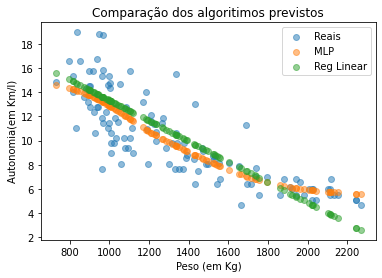

In [ ]:
X_test = escala.inverse_transform(X_norm_test)

plt.scatter(X_test, Y_test, alpha=0.5, label="Reais")
plt.scatter(X_test, Y_rna_previsao, alpha=0.5, label="MLP")
plt.scatter(X_test, Y_rl_previsao, alpha=0.5, label="Reg Linear")
plt.xlabel("Peso (em Kg)")
plt.ylabel("Autonomia(em Km/l)")
plt.title("Comparação dos algoritimos previstos")
plt.legend(loc=1)
# Mostrando grafico com os resultados do teste

In [ ]:
#Prever para um novo dado
X_futuro = np.array([[1250]])
X_futuro_norm = escala.transform(X_futuro.T)
#inserindo um novo dado e o transpondo para inserção correta

In [ ]:
Y_rna_prev_futuro = rna.predict(X_futuro_norm)
Y_reglinear_prev_futuro = reglinear.predict(X_futuro_norm)
# Criando variavel que preve como vai ficar depois do dado inserido

In [ ]:
print("RNA:", Y_rna_prev_futuro)
print("Reg linear:", Y_reglinear_prev_futuro)
# Mostrando os resultados da previsao

RNA: [2.31745169]
Reg linear: [-0.26031654]
